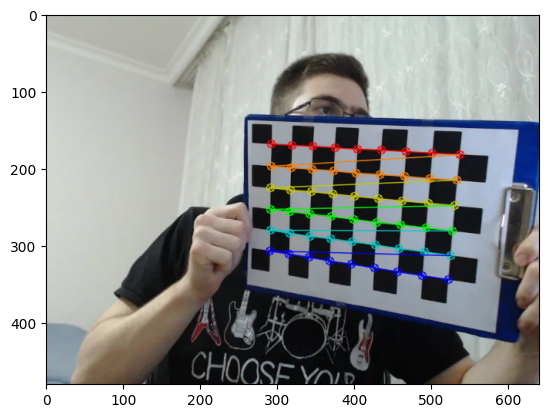

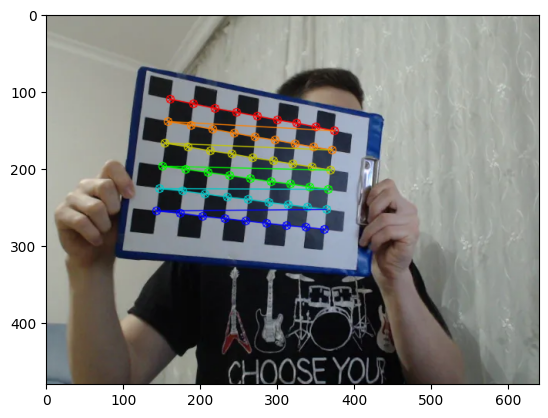

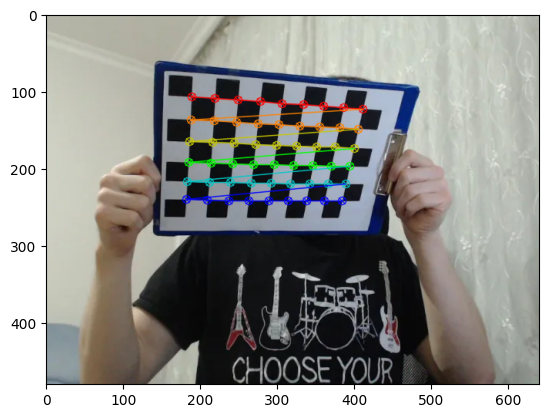

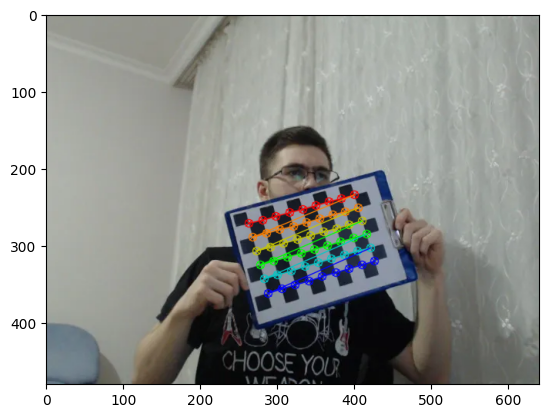

Camera matrix:
(3, 3)
[[603.88084067   0.         325.02512055]
 [  0.         603.85817444 235.61864123]
 [  0.           0.           1.        ]]
Distortion coefficients:
(1, 5)
[[ 1.75781456e-01 -1.33271061e+00 -4.90882859e-03  1.65139028e-03
   4.72218760e+00]]
Rotation vectors:
(array([[0.16267043],
       [0.41073499],
       [0.0645574 ]]), array([[-0.07460881],
       [-0.33137696],
       [ 0.1157703 ]]), array([[ 0.48503347],
       [-0.3074867 ],
       [ 0.08251097]]), array([[-0.14203741],
       [-0.15683472],
       [-0.27042754]]))
Translation vectors:
(array([[-1.13190138],
       [-2.33731103],
       [21.02886419]]), array([[-5.62642468],
       [-4.29596133],
       [20.95335416]]), array([[-4.44731334],
       [-4.17786563],
       [19.8530739 ]]), array([[-3.37753942],
       [ 1.95583419],
       [32.89866954]]))


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

PATERN_SIZE = (9,6)

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((PATERN_SIZE[0]*PATERN_SIZE[1],3), np.float32)
objp[:,:2] = np.mgrid[0:PATERN_SIZE[0],0:PATERN_SIZE[1]].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane

calib_dir = "img/"
for fname in os.listdir(calib_dir):
    img = cv.imread(os.path.join(calib_dir, fname))
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, PATERN_SIZE, None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        cv.drawChessboardCorners(img, PATERN_SIZE, corners2, ret)

        plt.imshow( cv.cvtColor(img, cv.COLOR_BGR2RGB) )
        plt.show()
cv.destroyAllWindows()

# calibration
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
# Print the intrinsic and extrinsic parameters
print('Camera matrix:'); print(mtx.shape); print(mtx)
print('Distortion coefficients:'); print(dist.shape); print(dist)
print('Rotation vectors:'); print(rvecs)
print('Translation vectors:'); print(tvecs)


# undistort